(-0.5, 1199.5, 1599.5, -0.5)

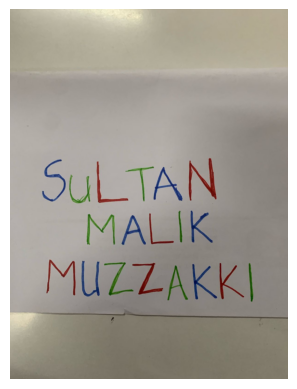

In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("Sultan.jpg")
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.axis('off')

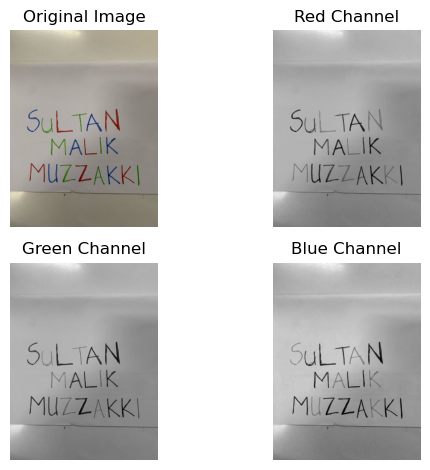

In [23]:
plt.subplot(2, 2, 1)
plt.imshow(rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(rgb[:,:,0], cmap="gray")
plt.title('Red Channel')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(rgb[:,:,1], cmap="gray")
plt.title('Green Channel')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(rgb[:,:,2], cmap="gray")
plt.title('Blue Channel')
plt.axis('off')

plt.tight_layout()
plt.show()

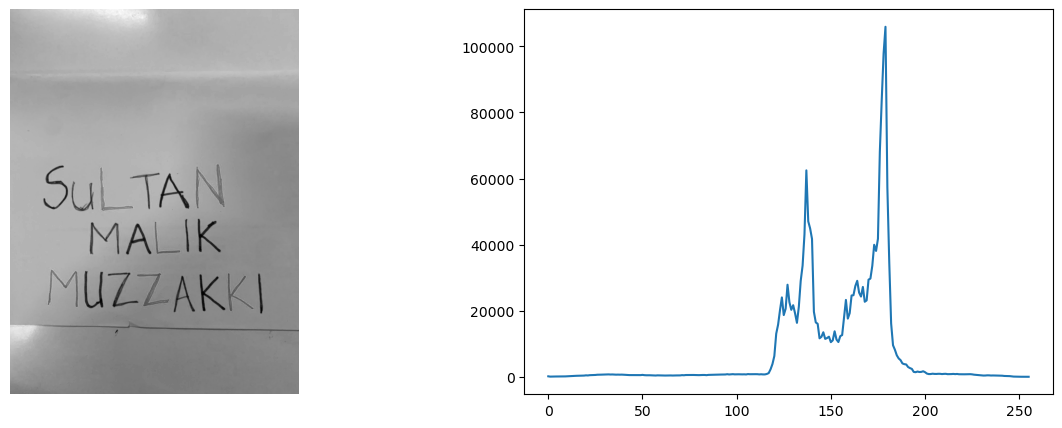

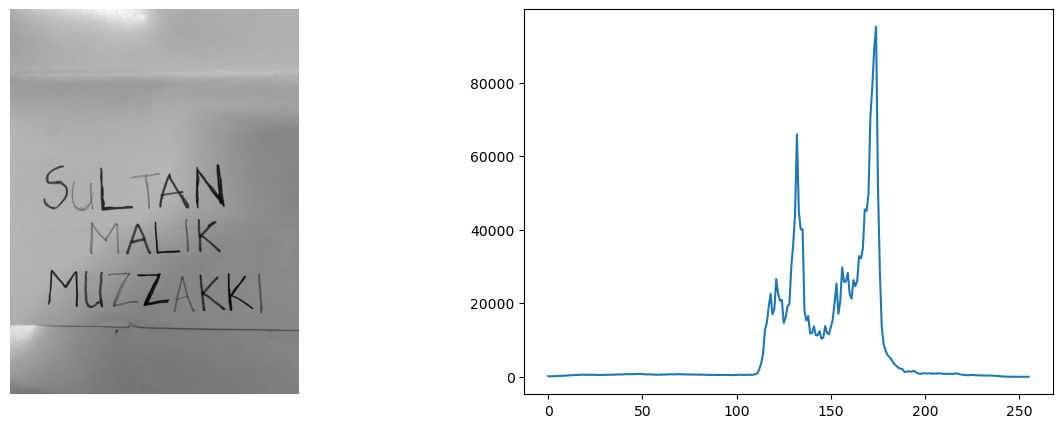

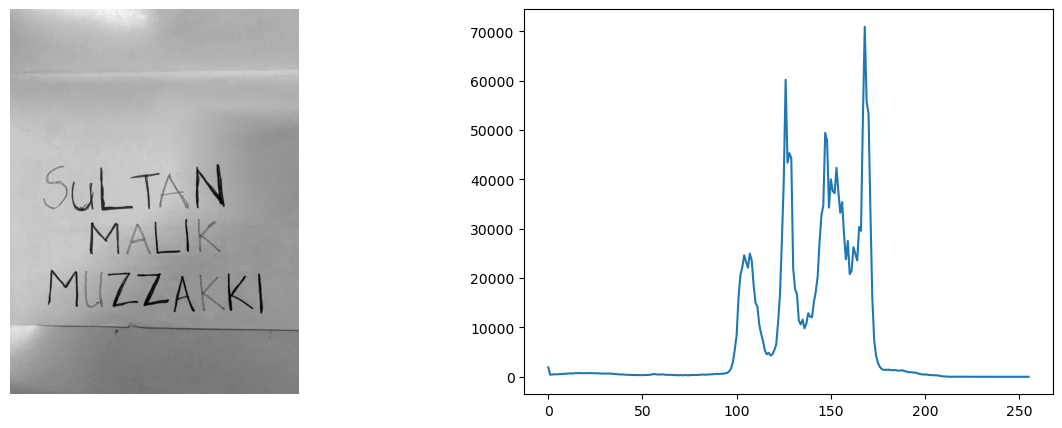

In [3]:
merah=rgb[:,:,0]
fig, axs = plt.subplots(1,2, figsize = (15,5))
hist = cv2.calcHist([merah],[0],None,[256],[0,256])
axs[0].imshow(merah, cmap='gray')
axs[0].axis('off')
axs[1].plot(hist)
plt.show()

hijau=rgb[:,:,1]
fig, axs = plt.subplots(1,2, figsize = (15,5))
hist = cv2.calcHist([hijau],[0],None,[256],[0,256])
axs[0].imshow(hijau, cmap='gray')
axs[0].axis('off')
axs[1].plot(hist)
plt.show()

biru=rgb[:,:,2]
fig, axs = plt.subplots(1,2, figsize = (15,5))
hist = cv2.calcHist([biru],[0],None,[256],[0,256])
axs[0].imshow(biru, cmap='gray')
axs[0].axis('off')
axs[1].plot(hist)
plt.show()

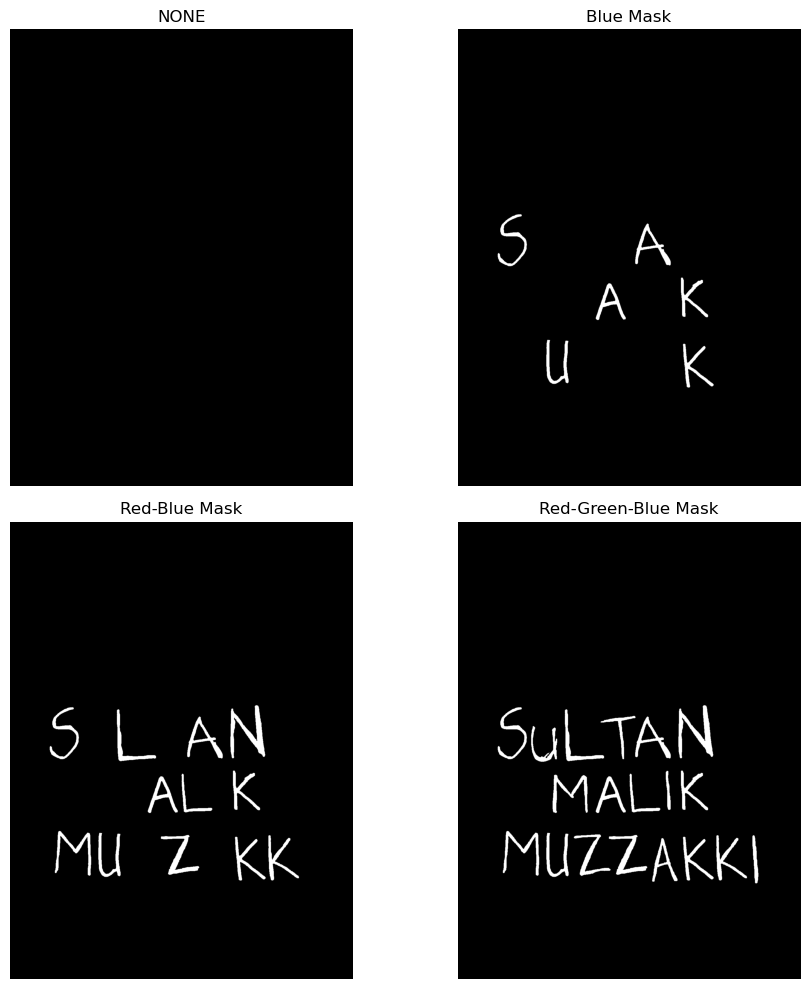

In [5]:
image_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

red_lower1 = np.array([0, 50, 50])
red_upper1 = np.array([10, 255, 255])
red_lower2 = np.array([170, 50, 50]) 
red_upper2 = np.array([180, 255, 255])

green_lower = np.array([36, 50, 50])
green_upper = np.array([86, 255, 255])

blue_lower = np.array([100, 50, 50])
blue_upper = np.array([140, 255, 255])


mask_red1 = cv2.inRange(image_hsv, red_lower1, red_upper1)
mask_red2 = cv2.inRange(image_hsv, red_lower2, red_upper2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2) 
mask_green = cv2.inRange(image_hsv, green_lower, green_upper)
mask_blue = cv2.inRange(image_hsv, blue_lower, blue_upper)

combined_mask1 = cv2.bitwise_or(mask_red, mask_blue)
combined_mask2 = cv2.bitwise_or(combined_mask1, mask_green)

(_, binary1) = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)

axs[0, 0].imshow(binary1, cmap='gray')
axs[0, 0].set_title('NONE')

axs[0, 1].imshow(mask_blue, cmap='gray')
axs[0, 1].set_title('Blue Mask')

axs[1, 0].imshow(combined_mask1, cmap='gray')
axs[1, 0].set_title('Red-Blue Mask')

axs[1, 1].imshow(combined_mask2, cmap='gray')
axs[1, 1].set_title('Red-Green-Blue Mask')

for ax in axs.flat:
    ax.axis('off')

plt.tight_layout()
plt.show()

(-0.5, 1199.5, 1599.5, -0.5)

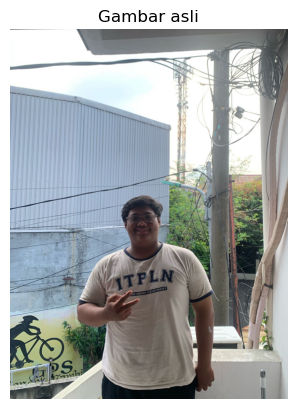

In [9]:
img2 = cv2.imread("Sultan2.jpg")
rgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
baris = rgb2.shape[0]
kolom = rgb2.shape[1]
plt.imshow(rgb2)
plt.title("Gambar asli")
plt.axis('off')

In [11]:
def show(x,y):
    plt.imshow(x, cmap='gray')
    plt.title(y)
    plt.axis('off')
    plt.show()

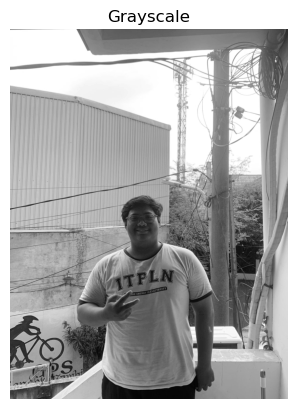

In [13]:
grayM = np.zeros((baris, kolom), dtype=np.uint8)
for i in range(baris):
    for j in range(kolom):
        grayM[i,j]=np.uint8(np.mean(rgb2[i,j]))

show(grayM, "Grayscale")

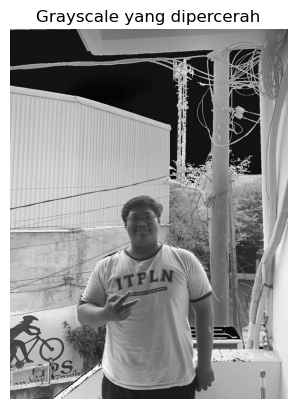

In [15]:
beta = 20
citra_cerah = np.zeros((baris, kolom, 3))

for x in range(baris):
    for y in range(kolom):
        gyx = grayM[x,y] + beta
        citra_cerah[x,y] = gyx

citra_cerah = citra_cerah.astype(np.uint8)
show(citra_cerah, "Grayscale yang dipercerah")

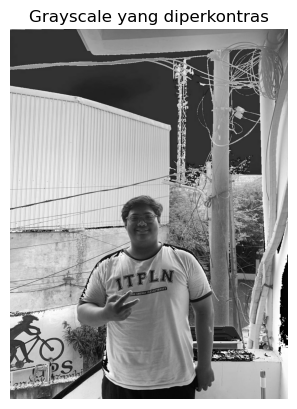

In [17]:
alpha = 1.2
citra_kontras = np.zeros((baris, kolom, 3))

for x in range(baris):
    for y in range(kolom):
        gyx = grayM[x,y] * alpha
        citra_kontras[x,y] = gyx

citra_kontras = citra_kontras.astype(np.uint8)
show(citra_kontras, "Grayscale yang diperkontras")

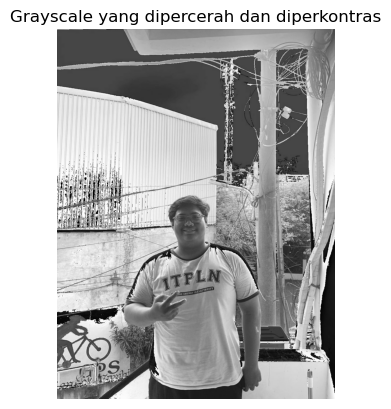

In [19]:
beta = 20
alpha = 1.2
citra_hasil = np.zeros((baris, kolom, 3))

for x in range(baris):
    for y in range(kolom):
        gyx = alpha *grayM[x,y] + beta
        citra_hasil[x,y] = gyx

citra_hasil = citra_hasil.astype(np.uint8)
show(citra_hasil, "Grayscale yang dipercerah dan diperkontras")